# Loading the data

In [11]:
import pandas as pd
data = pd.read_csv('C:\\Users\\PC\\Desktop\\IT Innovation\\project\\data\\airbnb_Chicago.csv')

# Outlier Detection

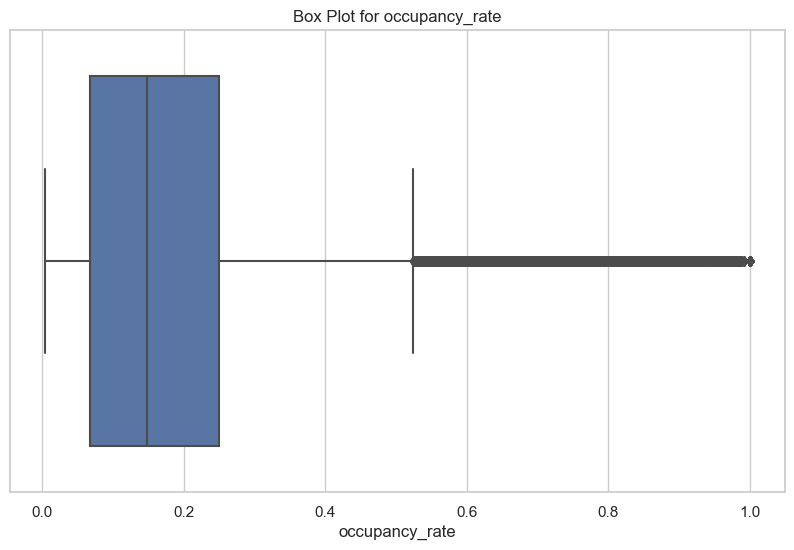

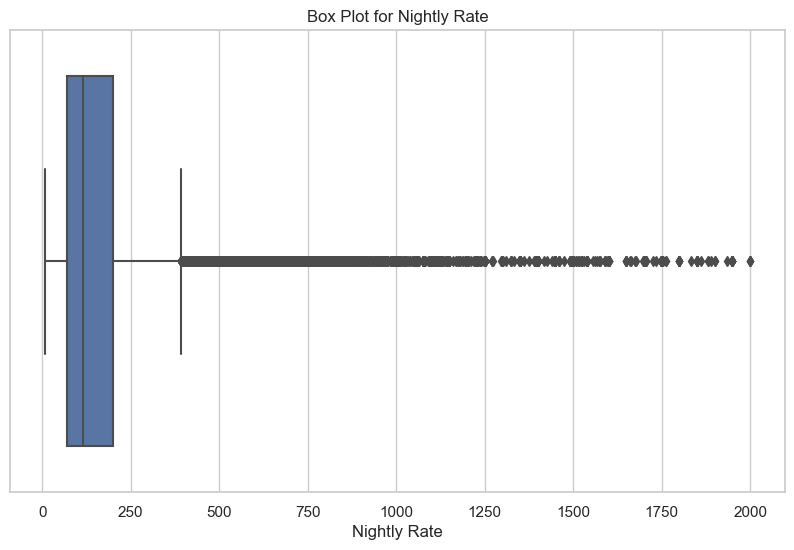

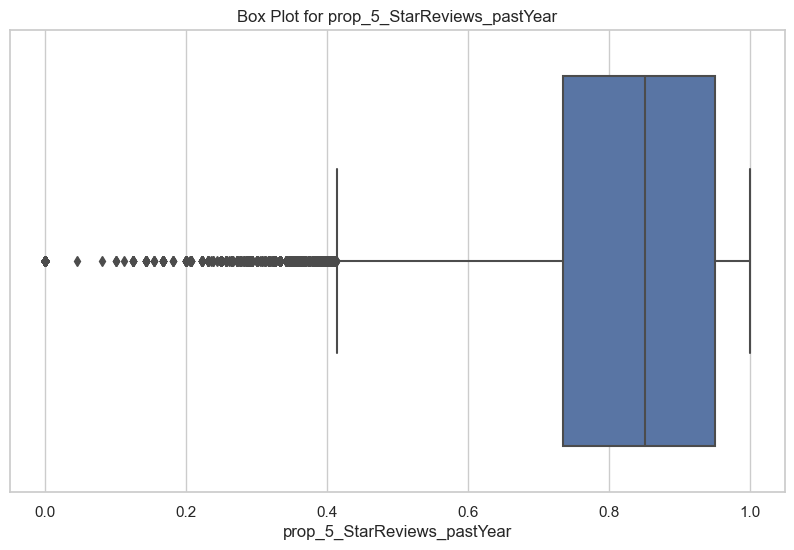

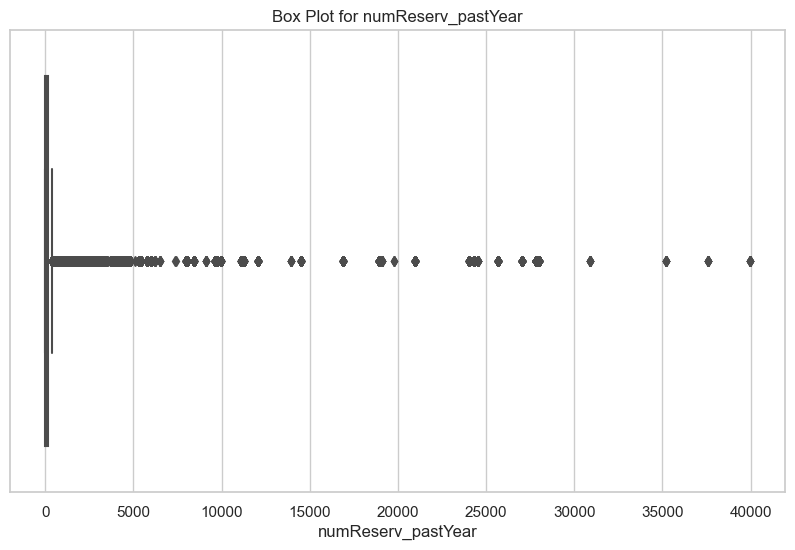

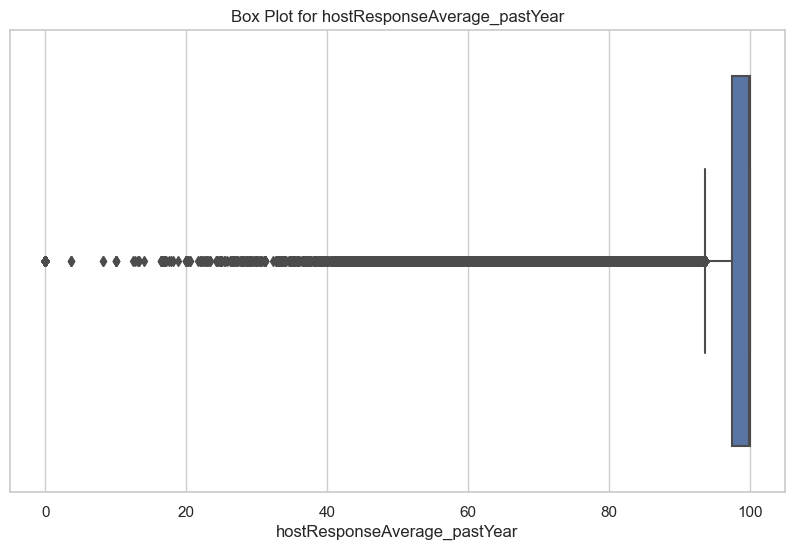

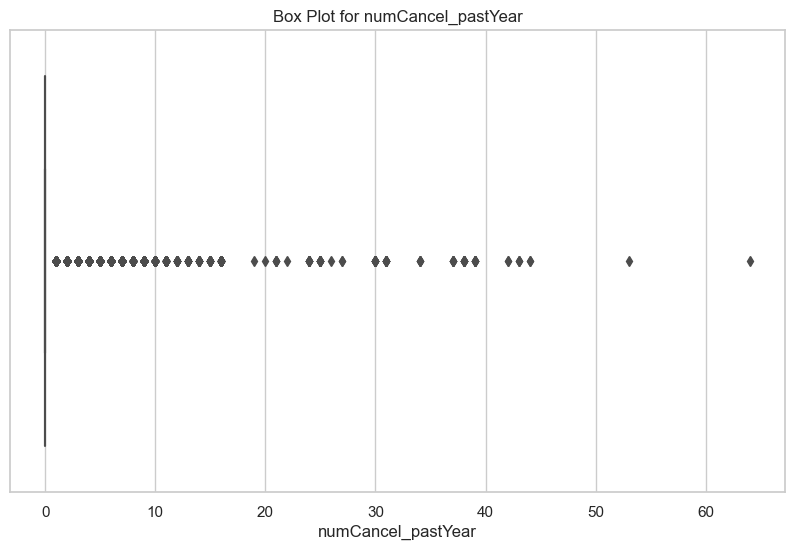

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'data' is a pre-loaded DataFrame with the required columns.

# Setting the style for the plots
sns.set(style="whitegrid")

# List of specific numerical columns to create box plots for
numerical_cols = ['occupancy_rate', 'Nightly Rate', 'prop_5_StarReviews_pastYear',
                  'numReserv_pastYear', 'hostResponseAverage_pastYear', 'numCancel_pastYear']

# Creating box plots for each specified numerical column
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot for {col}')
    plt.show()


# Null check and Imputation

In [13]:
print(data.isnull().sum())

Airbnb Host ID                0
Airbnb Property ID            0
City_x                        0
superhost_period_all          0
scrapes_in_period             0
                          ...  
revenue_period_tract          0
tract_booking_share           0
tract_revenue_share           0
time_to_date_mean         38108
prev_time_to_date_mean    44631
Length: 111, dtype: int64


Imputing Mean values

rating_ave_pastYear                   
numReviews_pastYear                   
numCancel_pastYear                    
num_5_star_Rev_pastYear               
prop_5_StarReviews_pastYear           
avg_rating_previousperiod_pastyear    
numReserv_pastYear                     
hostResponseAverage_pastYear           
available_days                        
available_days_aveListedPrice         
booked_days                           
booked_days_avePrice   
Cleaning Fee (USD)
tract_price_variance 

In [14]:
# List of columns to impute
columns_to_impute = [
    'rating_ave_pastYear', 'numReviews_pastYear', 'numCancel_pastYear',
    'num_5_star_Rev_pastYear', 'prop_5_StarReviews_pastYear',
    'avg_rating_previousperiod_pastyear', 'numReserv_pastYear', 
    'hostResponseAverage_pastYear', 'available_days', 
    'available_days_aveListedPrice', 'booked_days', 
    'booked_days_avePrice', 'Cleaning Fee (USD)', 'tract_price_variance'
]

# Imputing missing values in these columns with their mean
for col in columns_to_impute:
    if col in data.columns:
        data[col].fillna(data[col].mean(), inplace=True)

Dropping null records

Property Type 
Bedrooms                                 
Bathrooms  
Neighborhood
Max Guests
Minimum Stay                              
Number of Photos 
occupancy_rate 

In [15]:
# List of columns for which to drop rows with null values
columns_to_check = [
    'Property Type', 'Bedrooms', 'Bathrooms', 'Neighborhood', 
    'Max Guests', 'Minimum Stay', 'Number of Photos', 'occupancy_rate'
]

# Dropping rows where any of the specified columns have null values
data.dropna(subset=columns_to_check, inplace=True)

In [16]:
print(data.isnull().sum())

Airbnb Host ID                0
Airbnb Property ID            0
City_x                        0
superhost_period_all          0
scrapes_in_period             0
                          ...  
revenue_period_tract          0
tract_booking_share           0
tract_revenue_share           0
time_to_date_mean             0
prev_time_to_date_mean    18648
Length: 111, dtype: int64


# Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

# List of columns to apply Z-transformation
columns_to_scale = [
    'rating_ave_pastYear', 'numReviews_pastYear', 'numCancel_pastYear', 
    'num_5_star_Rev_pastYear', 
    'avg_rating_previousperiod_pastyear', 'numReserv_pastYear', 
    'hostResponseAverage_pastYear', 'available_days', 
    'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice',
    'Max Guests', 'Cleaning Fee (USD)', 'Minimum Stay', 'Number of Photos',
    'Nightly Rate', 'occupancy_rate', 'tract_superhosts_ratio', 
    'tract_price_variance', 'revenue_period_city'
]

# Creating StandardScaler object
scaler = StandardScaler()

# Applying Z-transformation to the specified columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# This code will scale the specified columns in the DataFrame 'data' using Z-transformation.


In [14]:
data.head()

,Airbnb Host ID,Airbnb Property ID,superhost_period_all,Prev_period,prev_host_is_superhost_in_period,superhost_date_diff,Superhost,prev_host_is_superhost,superhost_change,superhost_lost,...,Cleaning Fee (USD),Minimum Stay,Number of Photos,Pets Allowed,Instantbook Enabled,Nightly Rate,occupancy_rate,tract_superhosts_ratio,tract_price_variance,revenue_period_city
5,2613,2384,5,4,0,1,1,0,1,0,...,-0.865154,-0.156208,0.480065,False,0,-0.727287,-0.207285,-0.214217,-0.524433,-0.702100
6,2613,2384,6,5,1,1,1,1,0,0,...,-0.865154,-0.156208,0.480065,False,0,-0.700193,-0.539223,-0.792808,0.247751,-1.636441
7,2613,2384,7,6,1,1,1,1,0,0,...,-0.865154,-0.156208,0.480065,False,0,-0.710353,1.320544,-0.866986,-0.518666,-0.010945
8,2613,2384,8,7,1,1,1,1,0,0,...,-0.865154,-0.156208,0.480065,False,0,-0.661246,-0.178381,3.212822,-0.530257,0.141078
9,2613,2384,9,8,1,1,1,1,0,0,...,-0.865154,-0.156208,0.480065,False,0,-0.727287,0.053085,1.580899,-0.521433,-0.358561


# Correlation

In [15]:
from matplotlib import pyplot as plt

/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_90620/626409060.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


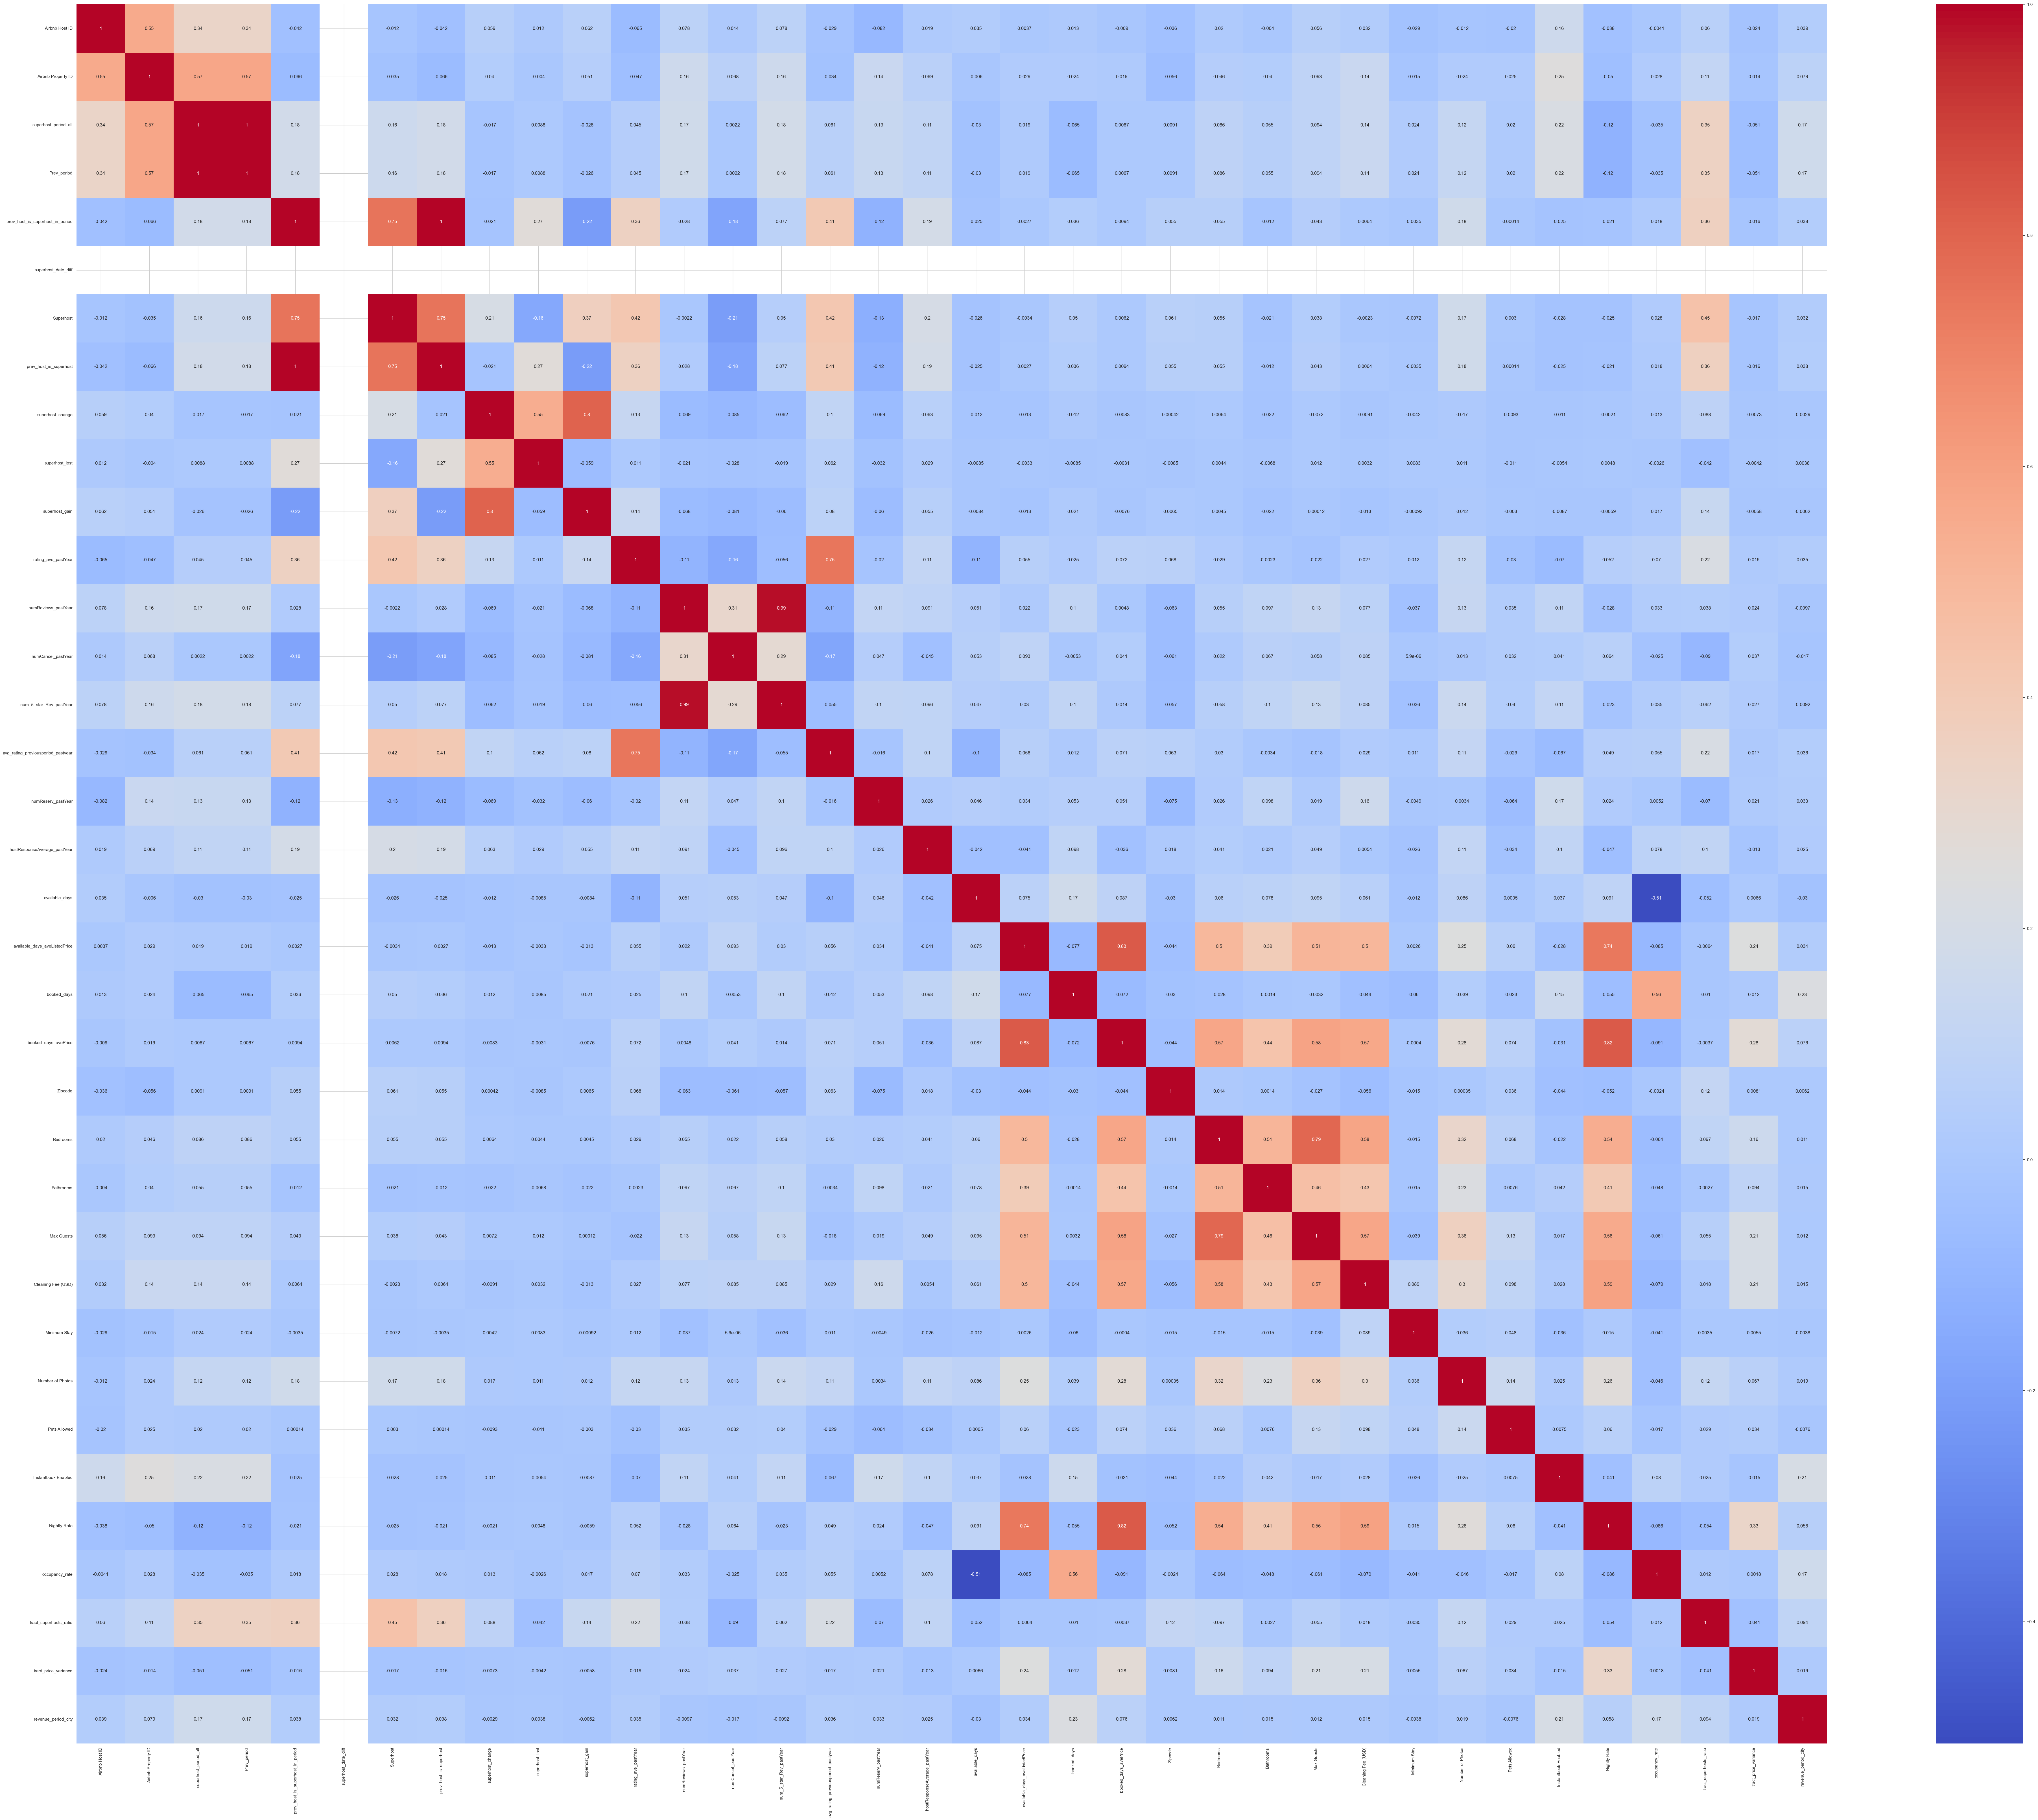

In [16]:
plt.figure(figsize=(100, 80))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Checking multicolinearity from VIF

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

columns_vif = ['rating_ave_pastYear', 'numReviews_pastYear', 'numCancel_pastYear', 
    'num_5_star_Rev_pastYear', 
    'avg_rating_previousperiod_pastyear', 'numReserv_pastYear', 
    'hostResponseAverage_pastYear', 'available_days', 
    'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice',
    'Max Guests', 'Cleaning Fee (USD)', 'Minimum Stay', 'Number of Photos',
    'Nightly Rate', 'occupancy_rate', 'tract_superhosts_ratio', 
    'tract_price_variance', 'revenue_period_city', 'Bedrooms', 
    'Bathrooms','superhost_period_all', 'Prev_period', 
    'prev_host_is_superhost_in_period', 'superhost_date_diff', 'Superhost',
    'prev_host_is_superhost', 'superhost_change', 'superhost_lost', 'superhost_gain']

# Assuming 'airbnb_data' is your DataFrame and 'columns_vif' contains the list of scaled columns
vif_data = data[columns_vif]

# Calculating VIF for each feature
vif = pd.DataFrame({
    'Variable': vif_data.columns,
    'VIF': [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
})

# Sorting VIF values in descending order
vif_sorted = vif.sort_values('VIF', ascending=False)

# Displaying the VIF values
print(vif_sorted)


/Users/harsh/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Users/harsh/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                              Variable        VIF
30                      superhost_gain        inf
29                      superhost_lost        inf
28                    superhost_change        inf
27              prev_host_is_superhost        inf
26                           Superhost        inf
24    prev_host_is_superhost_in_period        inf
23                         Prev_period        inf
22                superhost_period_all        inf
1                  numReviews_pastYear  52.691615
3              num_5_star_Rev_pastYear  52.220605
10                booked_days_avePrice   5.065856
15                        Nightly Rate   3.896957
8        available_days_aveListedPrice   3.316993
16                      occupancy_rate   3.238145
11                          Max Guests   3.186111
20                            Bedrooms   3.155744
9                          booked_days   2.654212
4   avg_rating_previousperiod_pastyear   2.435875
0                  rating_ave_pastYear   2.400568


Dropping these columns
superhost_gain 
superhost_lost
num_5_star_Rev_pastYear 
prev_host_is_superhost_in_period
Prev_period



and Checking VIF again

In [22]:
# Dropping the column 'prop_5_StarReviews_pastYear' from the DataFrame
data.drop(columns=['superhost_gain', 'superhost_lost', 'num_5_star_Rev_pastYear', 
                   'prev_host_is_superhost_in_period', 'Prev_period'], inplace=True)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

columns_vif = ['rating_ave_pastYear', 'numReviews_pastYear', 'numCancel_pastYear',
    'avg_rating_previousperiod_pastyear', 'numReserv_pastYear', 
    'hostResponseAverage_pastYear', 'available_days', 
    'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice',
    'Max Guests', 'Cleaning Fee (USD)', 'Minimum Stay', 'Number of Photos',
    'Nightly Rate', 'occupancy_rate', 'tract_superhosts_ratio', 
    'tract_price_variance', 'revenue_period_city', 'Bedrooms', 
    'Bathrooms','superhost_period_all', 'superhost_date_diff', 'Superhost',
    'prev_host_is_superhost', 'superhost_change']

# Assuming 'airbnb_data' is your DataFrame and 'columns_vif' contains the list of scaled columns
vif_data = data[columns_vif]

# Calculating VIF for each feature
vif = pd.DataFrame({
    'Variable': vif_data.columns,
    'VIF': [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
})

# Sorting VIF values in descending order
vif_sorted = vif.sort_values('VIF', ascending=False)

# Displaying the VIF values
print(vif_sorted)

                              Variable        VIF
22                 superhost_date_diff  23.131548
9                 booked_days_avePrice   5.062467
14                        Nightly Rate   3.895261
7        available_days_aveListedPrice   3.316844
15                      occupancy_rate   3.237864
10                          Max Guests   3.185922
19                            Bedrooms   3.151088
23                           Superhost   2.971184
8                          booked_days   2.654113
24              prev_host_is_superhost   2.621942
3   avg_rating_previousperiod_pastyear   2.410278
0                  rating_ave_pastYear   2.376514
6                       available_days   2.353066
11                  Cleaning Fee (USD)   2.054185
20                           Bathrooms   1.464538
16              tract_superhosts_ratio   1.419855
21                superhost_period_all   1.384817
13                    Number of Photos   1.254206
1                  numReviews_pastYear   1.238973


Dropping the column: 
superhost_date_diff


and Checking VIF again

In [25]:
# Dropping the column 'prop_5_StarReviews_pastYear' from the DataFrame
data.drop(columns=['superhost_date_diff'], inplace=True)

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

columns_vif = ['rating_ave_pastYear', 'numReviews_pastYear', 'numCancel_pastYear',
    'avg_rating_previousperiod_pastyear', 'numReserv_pastYear', 
    'hostResponseAverage_pastYear', 'available_days', 
    'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice',
    'Max Guests', 'Cleaning Fee (USD)', 'Minimum Stay', 'Number of Photos',
    'Nightly Rate', 'occupancy_rate', 'tract_superhosts_ratio', 
    'tract_price_variance', 'revenue_period_city', 'Bedrooms', 
    'Bathrooms','superhost_period_all', 'Superhost',
    'prev_host_is_superhost', 'superhost_change']

# Assuming 'airbnb_data' is your DataFrame and 'columns_vif' contains the list of scaled columns
vif_data = data[columns_vif]

# Calculating VIF for each feature
vif = pd.DataFrame({
    'Variable': vif_data.columns,
    'VIF': [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
})

# Sorting VIF values in descending order
vif_sorted = vif.sort_values('VIF', ascending=False)

# Displaying the VIF values
print(vif_sorted)

                              Variable       VIF
19                            Bedrooms  7.751903
21                superhost_period_all  6.491170
20                           Bathrooms  5.420134
9                 booked_days_avePrice  5.018953
22                           Superhost  4.814857
23              prev_host_is_superhost  4.037704
14                        Nightly Rate  3.800656
7        available_days_aveListedPrice  3.306495
15                      occupancy_rate  3.237685
10                          Max Guests  2.733788
8                          booked_days  2.645862
3   avg_rating_previousperiod_pastyear  2.404724
0                  rating_ave_pastYear  2.375614
6                       available_days  2.353065
11                  Cleaning Fee (USD)  1.935334
24                    superhost_change  1.295218
16              tract_superhosts_ratio  1.276618
13                    Number of Photos  1.247660
1                  numReviews_pastYear  1.228642
2                   

# Saving the dataframe to the final csv

In [28]:
# Assuming 'data' is your DataFrame
file_name = "airbnb_chicago_post_preprocessing.csv"  # Set the name of your output file
data.to_csv(file_name, index=False)  # Save DataFrame to a CSV file without the index